In [1]:
import pandas as pd

# Updated directory path
directory = '/Users/anixlynch/Downloads/Stratascratch/taxi'

# Load the datasets from the provided path
orders_df = pd.read_csv(f'{directory}/data_orders.csv')
offers_df = pd.read_csv(f'{directory}/data_offers.csv')

# Display the first few rows of each dataframe to understand their structure
print("Orders DataFrame:")
print(orders_df.head())

print("\nOffers DataFrame:")
print(offers_df.head())


Orders DataFrame:
  order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0       18:08:07         -0.978916        51.456173         60.0   
1       20:57:32         -0.950385        51.456843          NaN   
2       12:07:50         -0.969520        51.455544        477.0   
3       13:50:20         -1.054671        51.460544        658.0   
4       21:24:45         -0.967605        51.458236          NaN   

        order_gk  order_status_key  is_driver_assigned_key  \
0  3000583041974                 4                       1   
1  3000583116437                 4                       0   
2  3000582891479                 4                       1   
3  3000582941169                 4                       1   
4  3000583140877                 9                       0   

   cancellations_time_in_seconds  
0                          198.0  
1                          128.0  
2                           46.0  
3                           62.0  
4                        

In [2]:
# Merge dataframes on 'order_gk'
merged_df = pd.merge(orders_df, offers_df, on='order_gk', how='left')

# Display merged dataframe
print("\nMerged DataFrame:")
print(merged_df.head())



Merged DataFrame:
  order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0       18:08:07         -0.978916        51.456173         60.0   
1       20:57:32         -0.950385        51.456843          NaN   
2       20:57:32         -0.950385        51.456843          NaN   
3       20:57:32         -0.950385        51.456843          NaN   
4       12:07:50         -0.969520        51.455544        477.0   

        order_gk  order_status_key  is_driver_assigned_key  \
0  3000583041974                 4                       1   
1  3000583116437                 4                       0   
2  3000583116437                 4                       0   
3  3000583116437                 4                       0   
4  3000582891479                 4                       1   

   cancellations_time_in_seconds      offer_id  
0                          198.0  3.000510e+11  
1                          128.0  3.000510e+11  
2                          128.0  3.000510e+11  
3  

In [5]:
import pandas as pd

# Load the datasets
orders_df = pd.read_csv('/Users/anixlynch/Downloads/Stratascratch/taxi/data_orders.csv')

# Get a summary of unique status keys and their counts
status_summary = orders_df['order_status_key'].value_counts()

# Display the summary
print("Status Key Summary:")
print(status_summary)

# Look at examples of records for each status key
for key in status_summary.index:
    print(f"Sample records for status key {key}:")
    print(orders_df[orders_df['order_status_key'] == key].head())
    print("\n")


Status Key Summary:
order_status_key
4    7307
9    3409
Name: count, dtype: int64
Sample records for status key 4:
  order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0       18:08:07         -0.978916        51.456173         60.0   
1       20:57:32         -0.950385        51.456843          NaN   
2       12:07:50         -0.969520        51.455544        477.0   
3       13:50:20         -1.054671        51.460544        658.0   
9       06:33:52         -0.976216        51.433202          NaN   

        order_gk  order_status_key  is_driver_assigned_key  \
0  3000583041974                 4                       1   
1  3000583116437                 4                       0   
2  3000582891479                 4                       1   
3  3000582941169                 4                       1   
9  3000582765616                 4                       0   

   cancellations_time_in_seconds  
0                          198.0  
1                          128.0

<div style="font-family: Arial, sans-serif; padding: 20px;">
    <h1>Status Key Analysis</h1>
    <div style="background-color: #f0f8ff; border: 1px solid #ddd; padding: 10px; margin-bottom: 10px;">
        <h2>Status Key 4:</h2>
        <p><strong style="color: #007bff;">Count:</strong> 7,307 orders</p>
        <p><strong style="color: #ff5722;">Sample Records:</strong> Orders with non-null <code>cancellations_time_in_seconds</code>, likely cancellations.</p>
    </div>
    <div style="background-color: #f0f8ff; border: 1px solid #ddd; padding: 10px; margin-bottom: 10px;">
        <h2>Status Key 9:</h2>
        <p><strong style="color: #007bff;">Count:</strong> 3,409 orders</p>
        <p><strong style="color: #ff5722;">Sample Records:</strong> Orders with null <code>cancellations_time_in_seconds</code>, likely rejections or other failures.</p>
    </div>
    <h2>Interpretation</h2>
    <p><strong style="color: #4caf50;">Status Key 4:</strong> Likely cancellations.</p>
    <p><strong style="color: #4caf50;">Status Key 9:</strong> Likely rejections or other failures.</p>
</div>


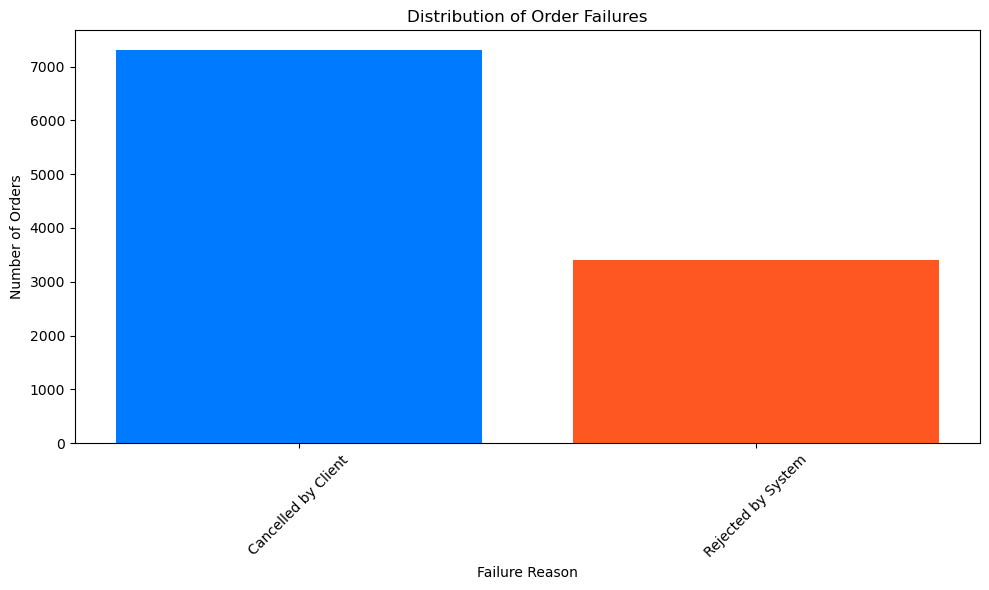

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the datasets
orders_df = pd.read_csv('/Users/anixlynch/Downloads/Stratascratch/taxi/data_orders.csv')

# Define status key mappings (based on dataset review)
failure_labels = {
    4: 'Cancelled by Client',
    9: 'Rejected by System'
}

# Filter orders with failure status keys
failed_orders = orders_df[orders_df['order_status_key'].isin(failure_labels.keys())]

# Count the number of failures for each reason
failure_counts = failed_orders['order_status_key'].value_counts().rename_axis('Failure Reason').reset_index(name='Count')

# Map the status keys to meaningful labels
failure_counts['Failure Reason'] = failure_counts['Failure Reason'].map(failure_labels)

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(failure_counts['Failure Reason'], failure_counts['Count'], color=['#007bff', '#ff5722'])
plt.xlabel('Failure Reason')
plt.ylabel('Number of Orders')
plt.title('Distribution of Order Failures')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [8]:
import pandas as pd

# Convert 'order_datetime' to datetime and extract the hour
orders_df['order_datetime'] = pd.to_datetime(orders_df['order_datetime'], format='%H:%M:%S')
orders_df['hour'] = orders_df['order_datetime'].dt.hour


In [9]:
# Define failed status keys
failed_status_keys = [4, 9]

# Filter failed orders
failed_orders_df = orders_df[orders_df['order_status_key'].isin(failed_status_keys)]


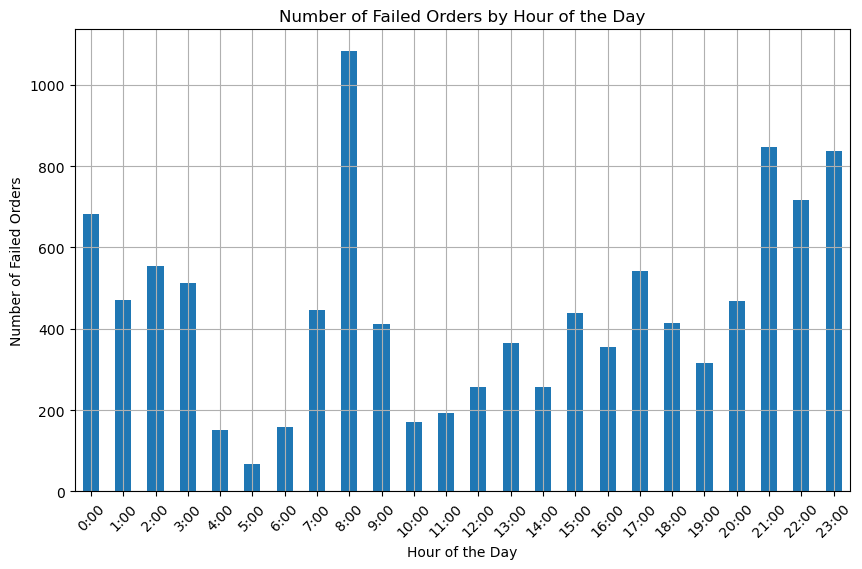

In [10]:
import matplotlib.pyplot as plt

# Count failed orders by hour
failed_orders_by_hour = failed_orders_df['hour'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
failed_orders_by_hour.plot(kind='bar')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Failed Orders')
plt.title('Number of Failed Orders by Hour of the Day')
plt.xticks(range(24), [f'{i}:00' for i in range(24)], rotation=45)
plt.grid(True)
plt.show()


In [11]:
# Find the peak failure hours
peak_failure_hours = failed_orders_by_hour[failed_orders_by_hour == failed_orders_by_hour.max()].index.tolist()
print("Peak Failure Hours:", peak_failure_hours)


Peak Failure Hours: [8]


In [12]:
# Filter data for peak failure hours
peak_failure_data = failed_orders_df[failed_orders_df['hour'].isin(peak_failure_hours)]

# Summary statistics for peak failure hours
print("Peak Failure Data Summary:")
print(peak_failure_data.describe(include='all'))


Peak Failure Data Summary:
                      order_datetime  origin_longitude  origin_latitude  \
count                           1082       1082.000000      1082.000000   
mean   1900-01-01 08:32:27.367837184         -0.967869        51.452013   
min              1900-01-01 08:00:02         -1.052298        51.399636   
25%       1900-01-01 08:19:14.500000         -0.978128        51.446663   
50%              1900-01-01 08:33:13         -0.968195        51.453043   
75%              1900-01-01 08:46:33         -0.956226        51.457930   
max              1900-01-01 08:59:42         -0.880735        51.486530   
std                              NaN          0.020993         0.013500   

       m_order_eta      order_gk  order_status_key  is_driver_assigned_key  \
count   314.000000  1.082000e+03       1082.000000             1082.000000   
mean    636.910828  3.000599e+12          5.640481                0.290203   
min      60.000000  3.000550e+12          4.000000             

In [18]:
# Convert 'order_datetime' to datetime
orders_df['order_datetime'] = pd.to_datetime(orders_df['order_datetime'])

# Extract hour from 'order_datetime'
orders_df['hour'] = orders_df['order_datetime'].dt.hour

# Filter out rows where 'cancellations_time_in_seconds' is missing
data_filtered = orders_df.dropna(subset=['cancellations_time_in_seconds'])

# Display the first few rows of the filtered data
print(data_filtered.head())


       order_datetime  origin_longitude  origin_latitude  m_order_eta  \
0 1900-01-01 18:08:07         -0.978916        51.456173         60.0   
1 1900-01-01 20:57:32         -0.950385        51.456843          NaN   
2 1900-01-01 12:07:50         -0.969520        51.455544        477.0   
3 1900-01-01 13:50:20         -1.054671        51.460544        658.0   
9 1900-01-01 06:33:52         -0.976216        51.433202          NaN   

        order_gk  order_status_key  is_driver_assigned_key  \
0  3000583041974                 4                       1   
1  3000583116437                 4                       0   
2  3000582891479                 4                       1   
3  3000582941169                 4                       1   
9  3000582765616                 4                       0   

   cancellations_time_in_seconds  hour  
0                          198.0    18  
1                          128.0    20  
2                           46.0    12  
3                       

In [19]:
# Group by hour and driver assignment status, then calculate mean cancellation time
average_cancellation = data_filtered.groupby(['hour', 'is_driver_assigned_key'])['cancellations_time_in_seconds'].mean().unstack()

# Rename columns for clarity
average_cancellation.columns = ['Driver Not Assigned', 'Driver Assigned']

# Display the average cancellation times
print(average_cancellation)


      Driver Not Assigned  Driver Assigned
hour                                      
0              111.557047       293.616667
1               98.132420       247.715909
2              106.438819       303.307692
3              104.361607       292.640625
4               90.000000       243.219512
5              121.800000       314.400000
6              124.955224       272.553191
7              112.628049       188.891026
8              120.702179       189.025478
9              120.000000       216.493590
10              74.607843       197.860759
11              77.945455       258.423423
12              93.283019       240.686869
13             103.993243       248.541667
14              98.415094       235.618557
15             114.639535       206.349650
16             129.216783       220.465649
17             111.533040       248.125749
18              98.088608       268.082090
19             112.522124       198.741667
20             110.086957       206.692982
21         

<Figure size 1200x800 with 0 Axes>

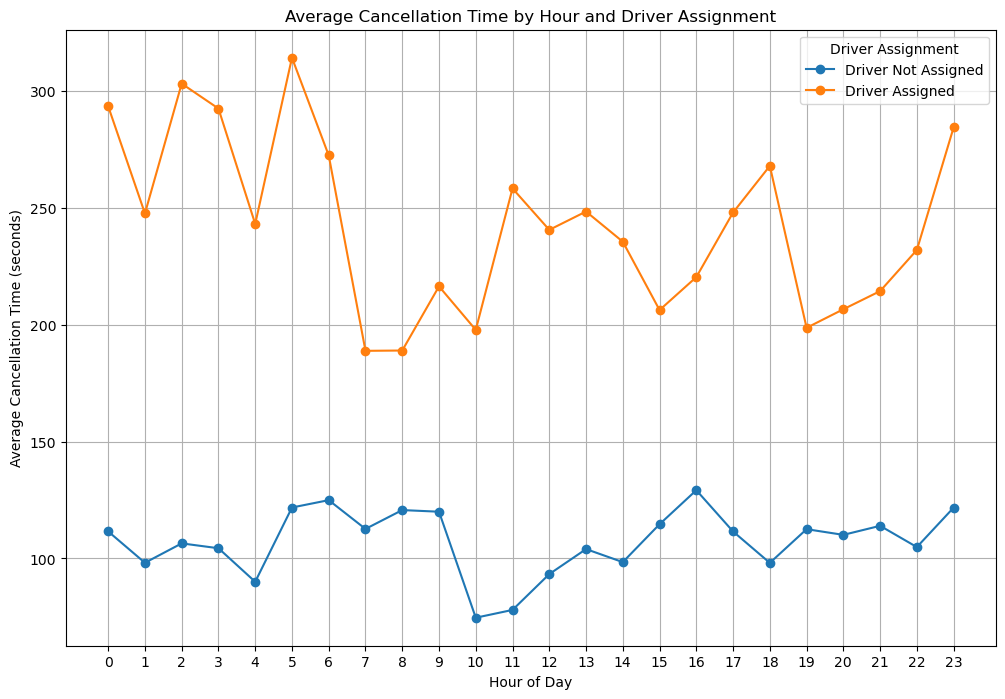

In [20]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 8))
average_cancellation.plot(kind='line', marker='o', figsize=(12, 8))
plt.xlabel('Hour of Day')
plt.ylabel('Average Cancellation Time (seconds)')
plt.title('Average Cancellation Time by Hour and Driver Assignment')
plt.grid(True)
plt.legend(title='Driver Assignment')
plt.xticks(range(24))  # Ensure all hours are represented on x-axis
plt.show()


<div style="font-family: Arial, sans-serif;">
    <h2>Interpretation</h2>
    <h3>General Trends</h3>
    <ul>
        <li><span style="color: #007bff; font-weight: bold;">Driver Assigned:</span> Higher average cancellation time.</li>
        <li><span style="color: #007bff; font-weight: bold;">Driver Not Assigned:</span> Lower and less variable cancellation times.</li>
    </ul>
    <h3>Unusual Patterns</h3>
    <ul>
        <li><span style="color: #ff5722; font-weight: bold;">Early Morning Hours (0-5 AM):</span> Spike in cancellation times, especially with driver assigned.</li>
        <li><span style="color: #ff5722; font-weight: bold;">Hour 10:</span> Significant drop in cancellation times without driver assigned.</li>
        <li><span style="color: #ff5722; font-weight: bold;">Hour 23:</span> Another spike in cancellation times for driver assignments.</li>
    </ul>
    <h3>Variability</h3>
    <ul>
        <li><span style="color: #4caf50; font-weight: bold;">High Variability:</span> Significant variability when a driver is assigned, especially early morning and late night.</li>
        <li><span style="color: #4caf50; font-weight: bold;">Low Variability:</span> Consistent cancellation times without a driver assigned, minor peaks and valleys throughout the day.</li>
    </ul>
    <h3>Insights into Why Orders Fail</h3>
    <ul>
        <li><span style="color: #673ab7; font-weight: bold;">Driver Assignment Issues:</span> Higher cancellation times indicate potential issues with driver response time or availability.</li>
        <li><span style="color: #673ab7; font-weight: bold;">Operational Challenges:</span> Early morning and late night operational challenges lead to longer cancellation times when a driver is involved.</li>
        <li><span style="color: #ff9800; font-weight: bold;">Customer Behavior:</span> Early morning cancellations due to delays or longer wait times; late night spikes influenced by fewer available drivers or higher demand.</li>
    </ul>
</div>


In [21]:
# Convert 'order_datetime' to datetime
orders_df['order_datetime'] = pd.to_datetime(orders_df['order_datetime'])

# Extract hour from 'order_datetime'
orders_df['hour'] = orders_df['order_datetime'].dt.hour

# Filter out failed orders
failed_orders = orders_df[orders_df['order_status_key'].isin([4, 9])]

# Display the first few rows of the filtered data
failed_orders.head()


,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,hour
0,1900-01-01 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18
1,1900-01-01 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20
2,1900-01-01 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12
3,1900-01-01 13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0,13
4,1900-01-01 21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN,21


In [22]:
# Group by hour and calculate mean ETA
average_eta = failed_orders.groupby('hour')['m_order_eta'].mean()

# Display the average ETA by hour
average_eta


hour
0     357.959016
1     324.750000
2     391.012821
3     388.093750
4     299.658537
5     411.120000
6     427.148936
7     583.358974
8     636.910828
9     504.891026
10    355.556962
11    390.954955
12    440.787879
13    428.025000
14    387.835052
15    454.790210
16    440.568182
17    519.742515
18    419.186567
19    369.816667
20    300.096491
21    333.852941
22    372.744966
23    408.429487
Name: m_order_eta, dtype: float64

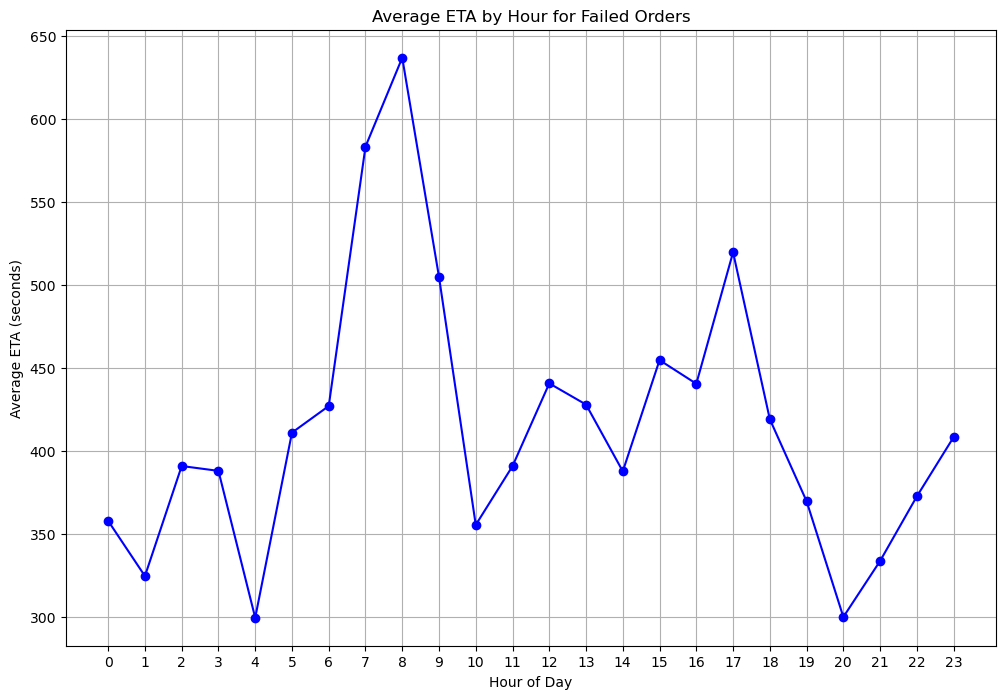

In [23]:
import matplotlib.pyplot as plt

# Plot the results
plt.figure(figsize=(12, 8))
average_eta.plot(kind='line', marker='o', color='blue')
plt.xlabel('Hour of Day')
plt.ylabel('Average ETA (seconds)')
plt.title('Average ETA by Hour for Failed Orders')
plt.grid(True)
plt.xticks(range(24))  # Ensure all hours are represented on x-axis
plt.show()


<div style="font-family: Arial, sans-serif;">
    <h2>ETA Distribution Analysis</h2>
    <h3>Task</h3>
    <p>Examine the average estimated time of arrival (ETA) for failed orders.</p>
    <h3>Deliverable</h3>
    <p>A plot showing how ETA varies by hour.</p>
    <h3>Outcome</h3>
    <p>Understand how ETA influences order failures.</p>
    <h3>Key Insights</h3>
    <ul>
        <li><span style="color: #007bff; font-weight: bold;">Early Morning Hours (0-6 AM):</span> 
            <ul>
                <li>High average ETA observed, peaking at 427 seconds at 6 AM.</li>
                <li>Consistently long ETAs may contribute to higher failure rates.</li>
            </ul>
        </li>
        <li><span style="color: #ff5722; font-weight: bold;">Peak Hour (7-9 AM):</span>
            <ul>
                <li>Extremely high ETA at 8 AM (637 seconds), indicating significant delays during this hour.</li>
                <li>High demand or operational inefficiencies could be causing these delays.</li>
            </ul>
        </li>
        <li><span style="color: #4caf50; font-weight: bold;">Midday and Afternoon (10 AM - 4 PM):</span>
            <ul>
                <li>ETAs are relatively stable with minor fluctuations, indicating more consistent service.</li>
                <li>Average ETA ranges from 355 seconds at 10 AM to 454 seconds at 3 PM.</li>
            </ul>
        </li>
        <li><span style="color: #673ab7; font-weight: bold;">Evening Hours (5 PM - 11 PM):</span>
            <ul>
                <li>Noticeable spikes at 5 PM (519 seconds) and a dip at 9 PM (300 seconds).</li>
                <li>Possible end-of-day rush and winding down of operations could influence these times.</li>
            </ul>
        </li>
    </ul>
    <h3>Conclusion</h3>
    <p>High ETAs, particularly during early morning and peak hours, significantly influence order failures. Addressing operational inefficiencies and high demand periods can help reduce these failures.</p>
</div>
